# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [2]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [5]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [3]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

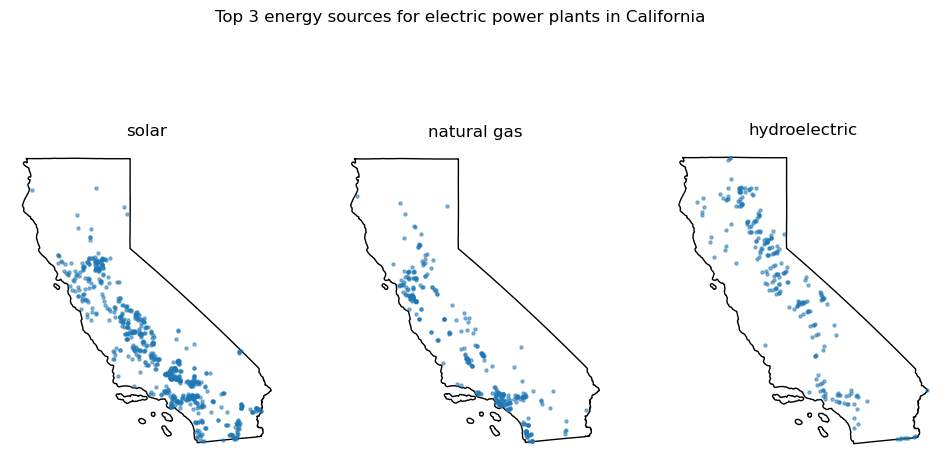

In [4]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

My recommended steps for writing a function:

1. solve the problem for a specific example
2. identify which parts of the code need to be generalized and update these parts
3. wrap this into a function
4. additional parameters or assert statements
5. test function
6. add a docstring

Example: we want to obtain the top three power sources for any state programmatically as a function

### Step 1: solve for a specific example

Example: solve this for CA

In [10]:
state_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 2: Identify parts of the code that need to be generalized

In [12]:
state = 'California'
state_power_plants = power_plants[power_plants['state'] == state]
top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: define the function 
and 
### Step 4: adjust parameters

In [17]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = (state_power_plants['primsource']
                    .value_counts()
                    .index[:3]
                    .tolist())
    return top_sources

In [18]:
top3_sources('Oregon', power_plants)

['solar', 'hydroelectric', 'wind']

## Example

Create a function that will produce a plot given a list of primary sources and a state name. 

## Step 1: solve an example

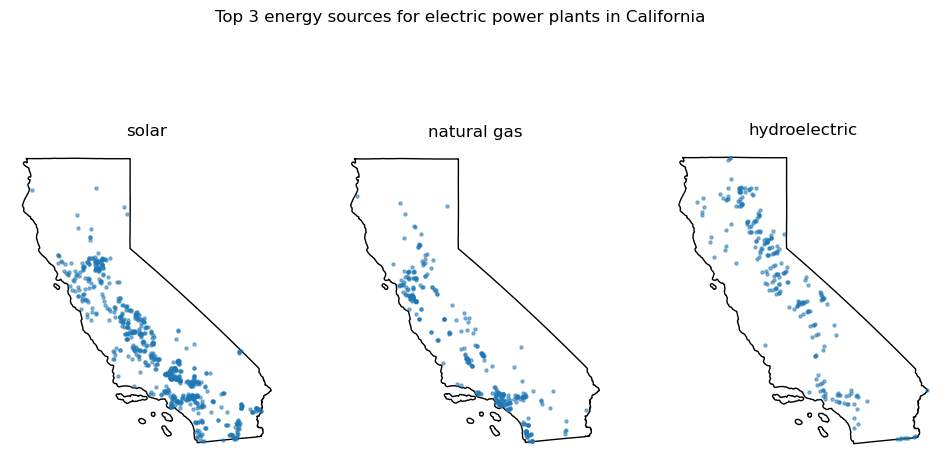

In [20]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step 2: which parts of the code need to be generalized?

Anything where CA is used specifically

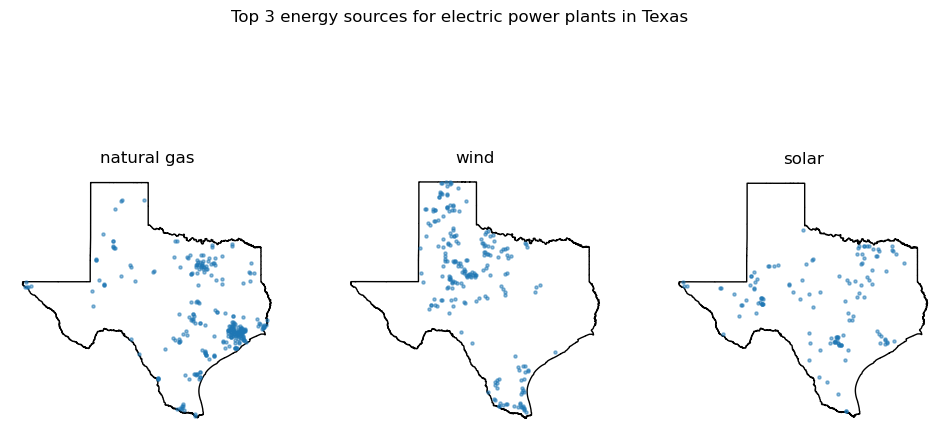

In [25]:
state = 'Texas'
# Select state power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

In [26]:
def plot_top3_sources(state, power_plants, states):
    state = 'Texas'
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

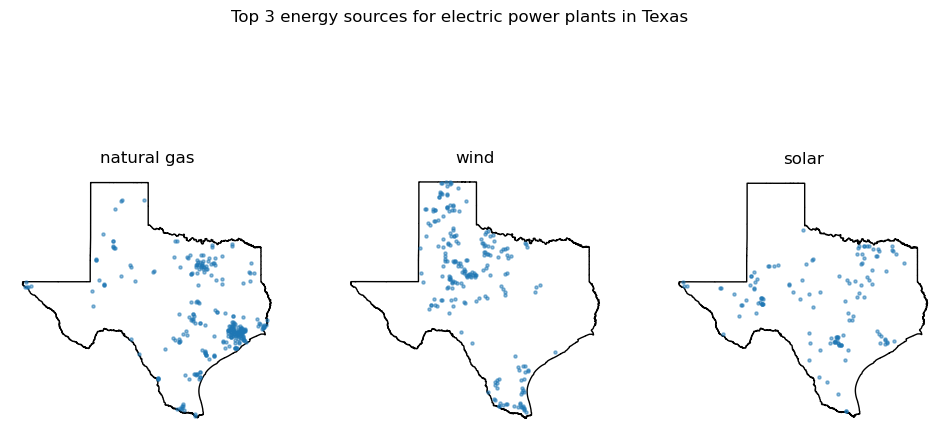

In [27]:
plot_top3_sources('Texas', power_plants, states)

In [28]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


In [55]:
def state_power_series(powersource, power_plants, states):
    source_filter = power_plants[power_plants['primsource'] == powersource]
    return source_filter.groupby('state').size().sort_values(ascending = False)


In [56]:
state_power_series('wind', power_plants, states)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
Idaho              32
New York           32
New Mexico         29
Pennsylvania       26
Wyoming            25
Washington         23
South Dakota       23
Ohio               22
Massachusetts      20
Maine              20
Indiana            20
Montana            19
Rhode Island       19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
Vermont             5
Utah                5
New Hampshire       5
Maryland            5
Alaska              4
Puerto Rico         2
Tennessee           2
New Jersey          2
North Carolina      1
Nevada              1
Virginia            1
Delaware            1
Connecticut         1
dtype: int64

In [98]:
def plot_top3_states(powersource, power_plants, states):
    # Find top 3 states with power source were previously given
    top_state_sources = state_power_series(powersource, power_plants, states)[:3]
    print(top_state_sources)
    
    # Select state boundary
    for i in top_state_sources:
        list = []
        statename = top_state_sources[i].astype(str)
        state_boundary = states[states['name'] == statename]
        list.append[state_boundary]
        return list
        

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, boundary in zip(ax, list):   # Iterate over subplots and boundaries

        axis.set_title(boundary)
        
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 states for {powersource}")    
    plt.show()

In [99]:
plot_top3_states('wind', power_plants, states)

state
Texas        215
Minnesota    122
Iowa         121
dtype: int64


/var/folders/tc/xh8th4j154nbqk7xcpcs2_bm0000gn/T/ipykernel_22360/2906855624.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statename = top_state_sources[i].astype(str)


IndexError: index 215 is out of bounds for axis 0 with size 3